## Q1: Introduction to AI/ML/DL (1 Mark)

Logistic Regression Accuracy: 1.0


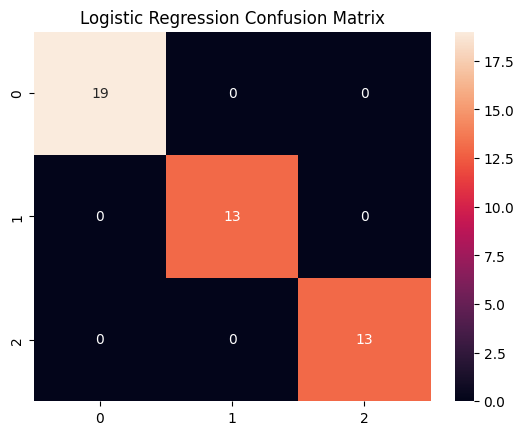

Decision Tree Accuracy: 1.0


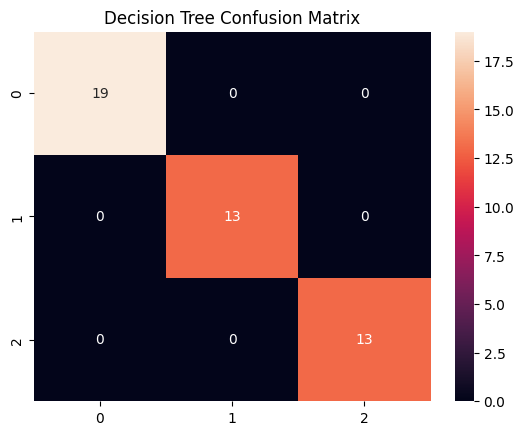

Neural Network Accuracy: 1.0


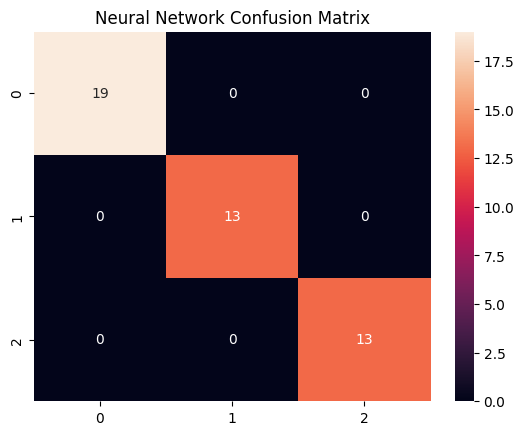

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

data = load_iris()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, mlp_pred))
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True, fmt='d')
plt.title("Neural Network Confusion Matrix")
plt.show()

> Neural Networks can model non-linear relationships more effectively than t to complex data patterns without manually crafted features.

##  Q2: Mathematics for Deep Learning (4 Marks)

Matrix A:
 [[2 4 1]
 [3 3 1]
 [3 1 4]]
Matrix B:
 [[1 3 3]
 [3 1 3]
 [2 4 1]]
Product:
 [[16 14 19]
 [14 16 19]
 [14 26 16]]
Determinant of A: -20.000000000000007
Inverse of A:
 [[-0.55  0.75 -0.05]
 [ 0.45 -0.25 -0.05]
 [ 0.3  -0.5   0.3 ]]
Eigenvalues: [ 7.23606798 -1.          2.76393202]
Eigenvectors:
 [[-0.5324074  -0.78488277 -0.28315849]
 [-0.5324074   0.49571543 -0.28315849]
 [-0.65809173  0.37178657  0.91632011]]


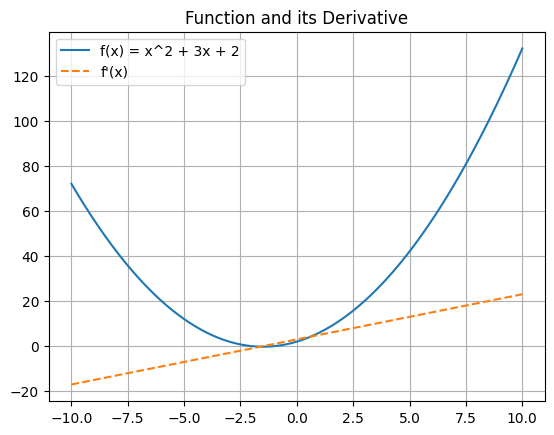

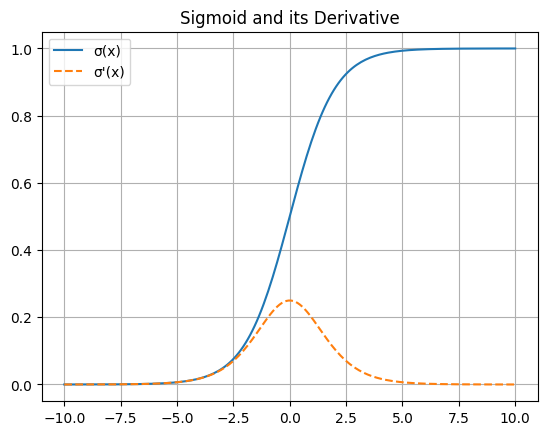

Cross Entropy: 1.0986122886681098
KL Divergence: 0.06895927460353621


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix multiplication
A = np.random.randint(1, 5, (3, 3))
B = np.random.randint(1, 5, (3, 3))
product = np.dot(A, B)
print("Matrix A:\n", A)
print("Matrix B:\n", B)
print("Product:\n", product)

# Determinant and Inverse
det_A = np.linalg.det(A)
print("Determinant of A:", det_A)

if det_A != 0:
    inv_A = np.linalg.inv(A)
    print("Inverse of A:\n", inv_A)
else:
    print("Matrix A is singular and has no inverse.")

# Eigenvalues and Eigenvectors
eig_vals, eig_vecs = np.linalg.eig(A)
print("Eigenvalues:", eig_vals)
print("Eigenvectors:\n", eig_vecs)

# Plot functions
x = np.linspace(-10, 10, 400)
f = x**2 + 3*x + 2
df = 2*x + 3
plt.plot(x, f, label="f(x) = x^2 + 3x + 2")
plt.plot(x, df, label="f'(x)", linestyle='--')
plt.legend()
plt.title("Function and its Derivative")
plt.grid(True)
plt.show()

# Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

x = np.linspace(-10, 10, 200)
plt.plot(x, sigmoid(x), label='σ(x)')
plt.plot(x, d_sigmoid(x), label="σ'(x)", linestyle='--')
plt.title("Sigmoid and its Derivative")
plt.legend()
plt.grid(True)
plt.show()

# Cross Entropy and KL-Divergence
P = np.array([0.2, 0.5, 0.3])
Q = np.array([1/3, 1/3, 1/3])
cross_entropy = -np.sum(P * np.log(Q))
kl_divergence = np.sum(P * np.log(P / Q))
print("Cross Entropy:", cross_entropy)
print("KL Divergence:", kl_divergence)


##  Q3: Neural Networks Basics (4 Marks)

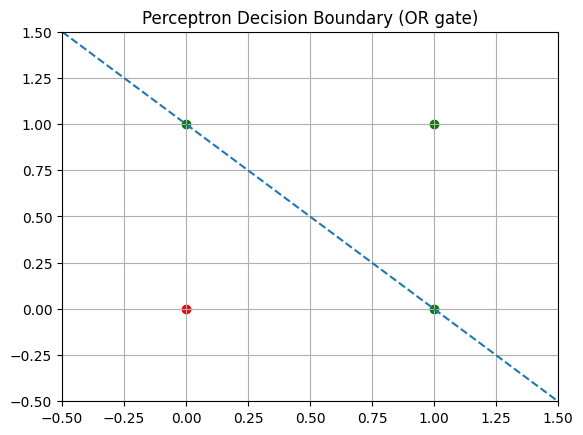

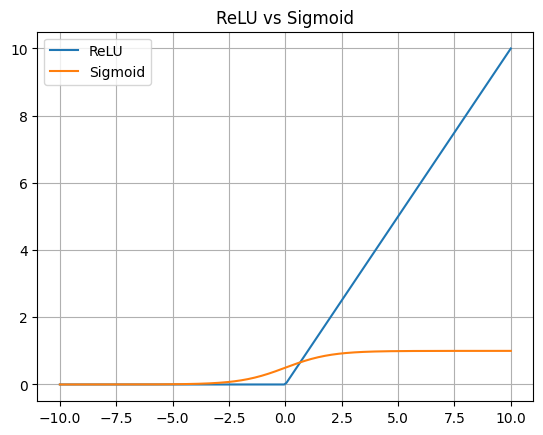

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron using NumPy
class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=10):
        self.W = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs

    def activation_fn(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, x):
        z = self.W.T.dot(x)
        return self.activation_fn(z)

    def fit(self, X, d):
        for _ in range(self.epochs):
            for xi, target in zip(X, d):
                xi = np.insert(xi, 0, 1)
                y = self.predict(xi)
                self.W += self.lr * (target - y) * xi

# Binary dataset (OR gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

perceptron = Perceptron(input_size=2)
perceptron.fit(X, y)

# Visualize input and decision boundary
for i, label in enumerate(y):
    plt.scatter(*X[i], c='red' if label == 0 else 'green')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

w = perceptron.W
x_vals = np.array([-1, 2])
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, '--')
plt.title("Perceptron Decision Boundary (OR gate)")
plt.grid(True)
plt.show()

# ReLU and Sigmoid
def relu(x): return np.maximum(0, x)
def sigmoid(x): return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 200)
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.title("ReLU vs Sigmoid")
plt.legend()
plt.grid(True)
plt.show()


##  Q4: Training Neural Networks (6 Marks)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
SGD RMSE: 7.3001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Adam RMSE: 1.1934


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSprop RMSE: 1.1747


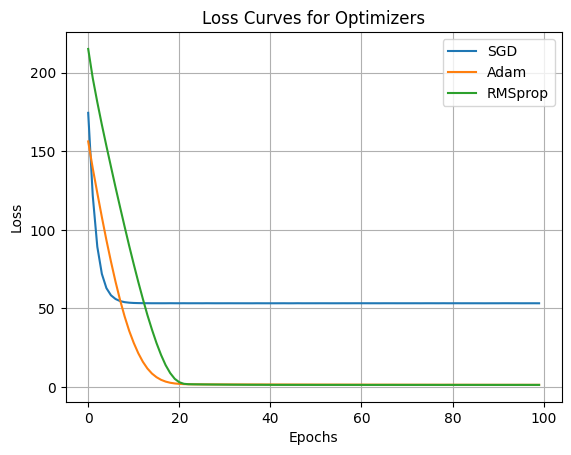

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 500)
Y = 2.5 * X + np.sin(X) + np.random.normal(0, 1, X.shape)
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

def build_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(1)
    ])
    return model

optimizers = {'SGD': SGD(), 'Adam': Adam(), 'RMSprop': RMSprop()}
results = {}

for name, optimizer in optimizers.items():
    model = build_model()
    model.compile(optimizer=optimizer, loss='mse')
    history = model.fit(X, Y, epochs=100, verbose=0)
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(Y, y_pred))
    results[name] = {'rmse': rmse, 'loss': history.history['loss']}
    print(f"{name} RMSE: {rmse:.4f}")
    plt.plot(history.history['loss'], label=name)

plt.title("Loss Curves for Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


> Adam tends to perform best because it combines the advantages of AdaGrad and RMSProp with adaptive learning rates and momentum.

##  Q5: Deep Learning Frameworks (4 Marks)

In [5]:
# TensorFlow CNN
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model_tf = Sequential([
    Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_tf.fit(x_train, y_train, epochs=3, verbose=0)
tf_eval = model_tf.evaluate(x_test, y_test)
print("TensorFlow Test Accuracy:", tf_eval[1])
model_tf.summary()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.0914
TensorFlow Test Accuracy: 0.9760000109672546


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        27,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,632 (318.88 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,422 (212.59 KB)

In [6]:
# PyTorch CNN
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2)
        self.fc = nn.Linear(16*13*13, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv(x)))
        x = x.view(-1, 16*13*13)
        x = self.fc(x)
        return torch.log_softmax(x, dim=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

for epoch in range(1):
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1)
        correct += pred.eq(target).sum().item()
        total += target.size(0)

print("PyTorch Test Accuracy:", correct / total)


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.37MB/s]


PyTorch Test Accuracy: 0.953


> TensorFlow with Keras offers cleaner syntax and a higher level of abstraction. PyTorch provides more flexibility and control. Preferred depends on task: for rapid prototyping, **TensorFlow**; for research, **PyTorch**.